In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\prabh\Desktop\data set\BitCoin\BTC-Daily.csv")
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())

         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  
(2651, 9)
               unix          open          high           low         close  \
count  2.651000e+03   2651.000000   2651.000000   2651.000000   2651.000000   
mean   1.531613e+09  11693.189332  12038.562912  11296.539461  11709.326213   
std    6.613247e+07  16272.554746  16739.237

###  visualizing the closing price of Bitcoin over time using Matplotlib

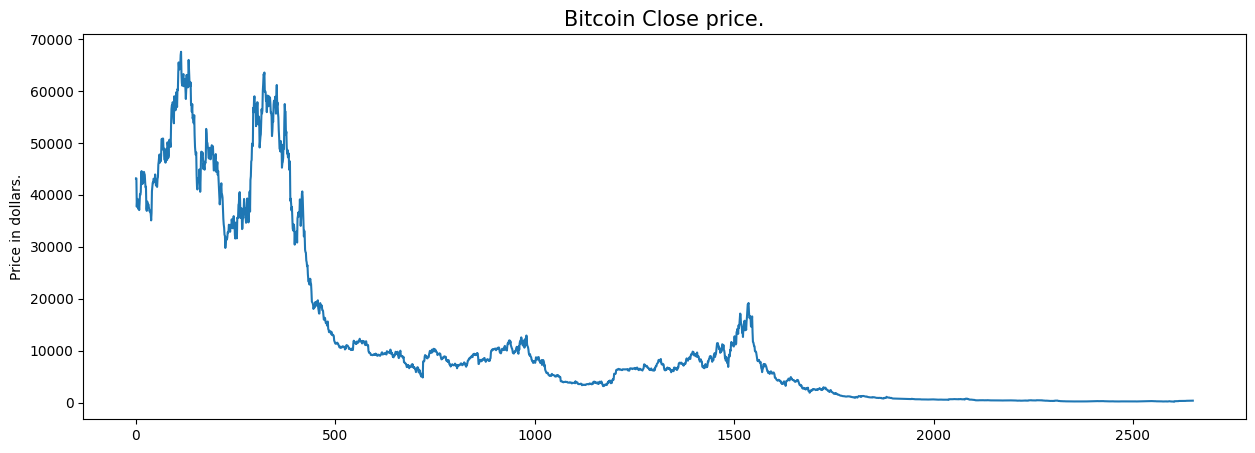

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [4]:
print("Check if data is null:")
print(df.isnull().sum())

Check if data is null:
unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


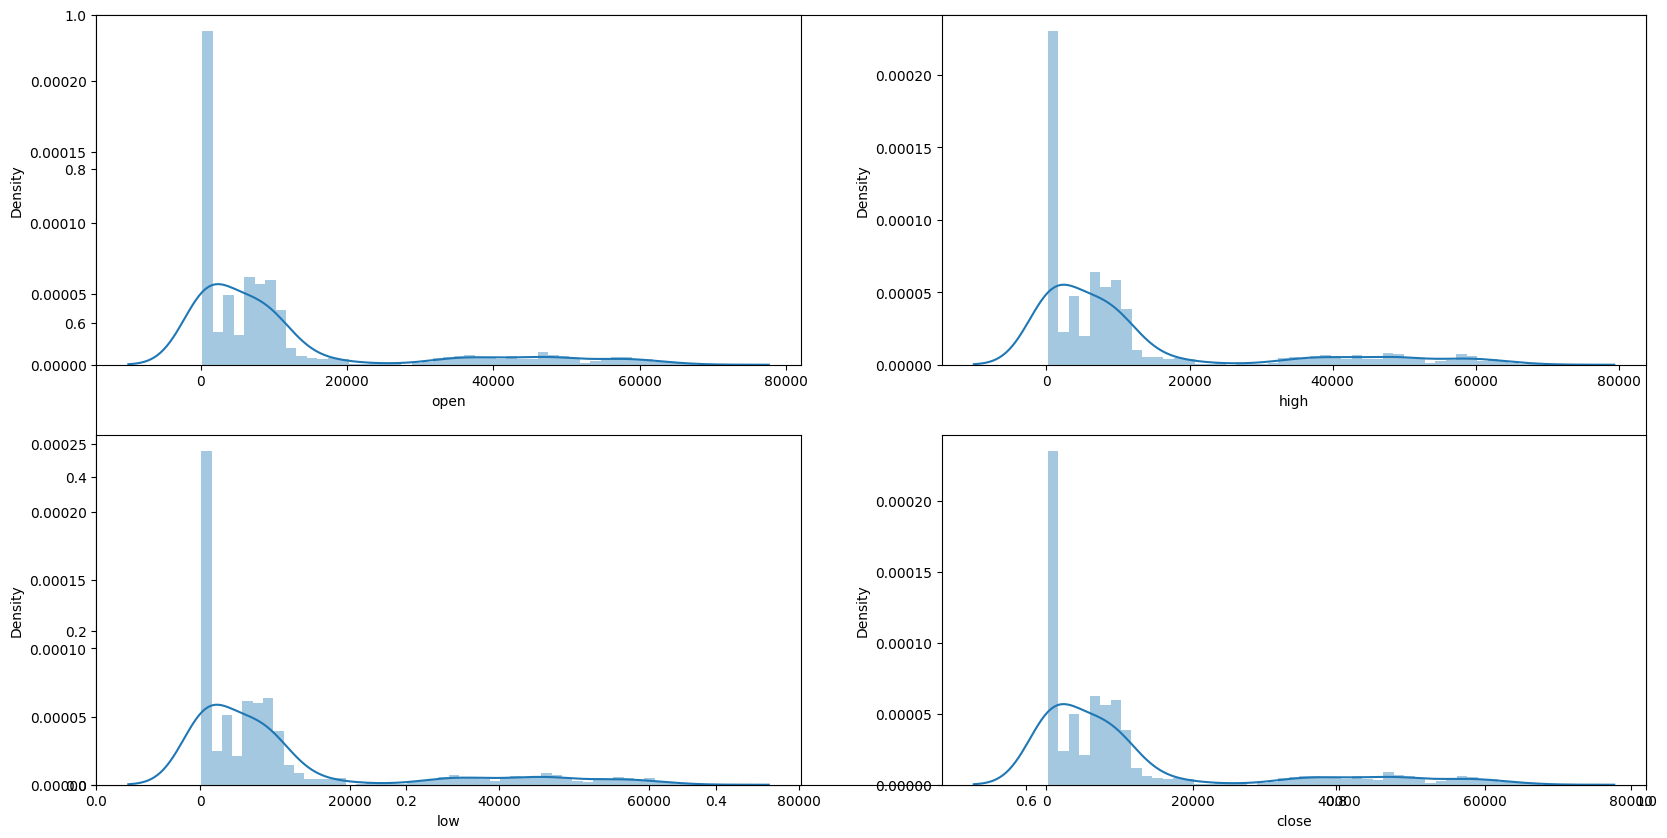

In [7]:
features = ['open', 'high', 'low', 'close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.distplot(df[col])
plt.show()

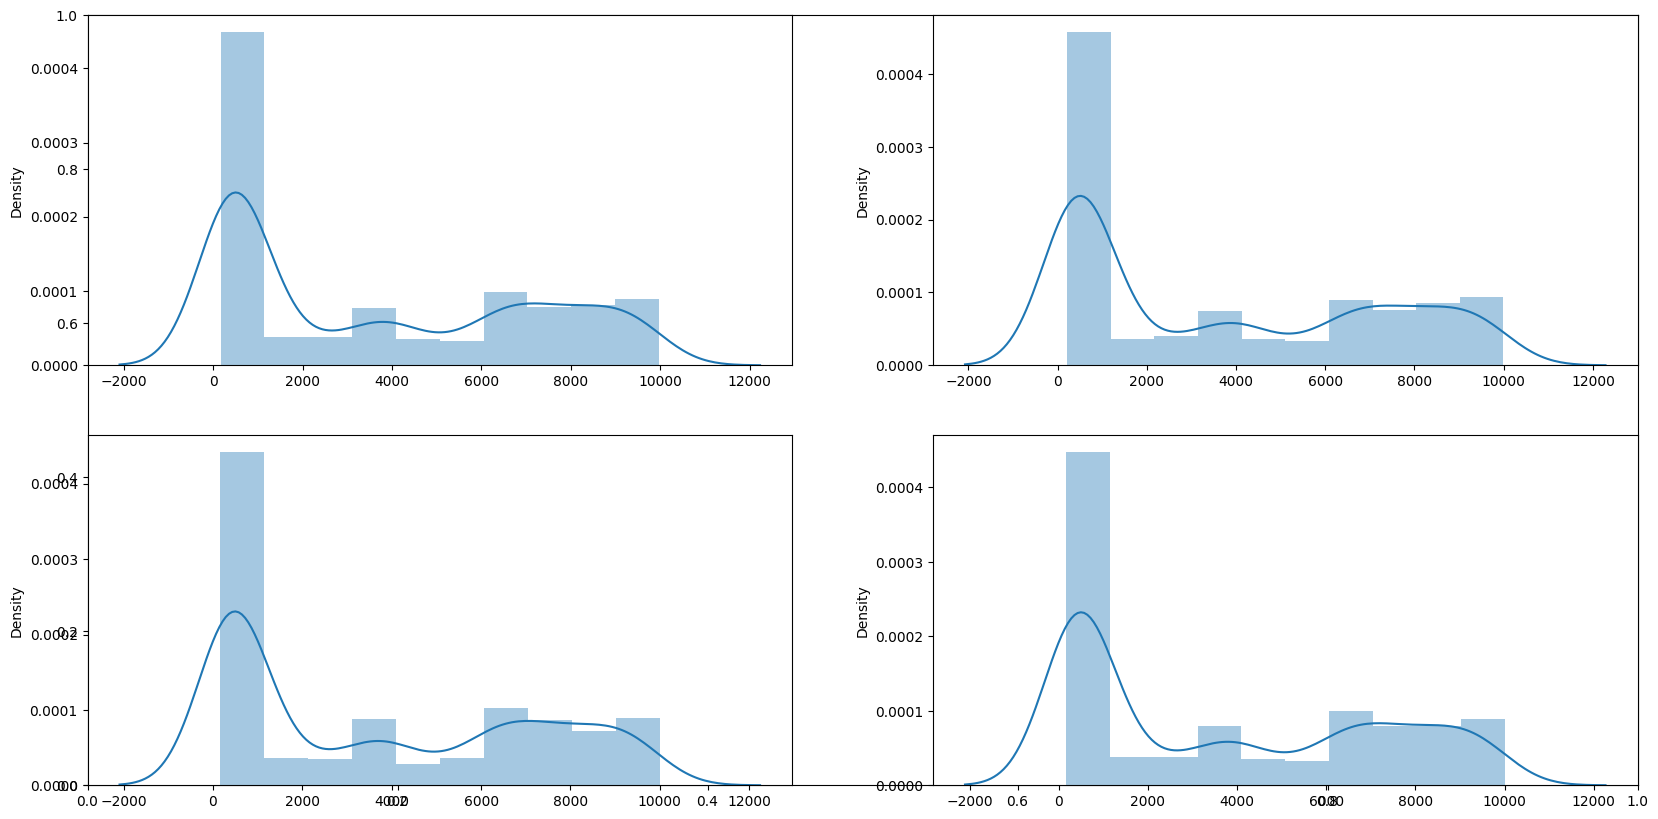

In [8]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    range_min = 0.0
    range_max = 10000.0
    filtered_data = [x for x in df[col] if range_min <= x <= range_max]
    plt.subplot(2, 2, i + 1)
    sb.distplot(filtered_data)
plt.show()


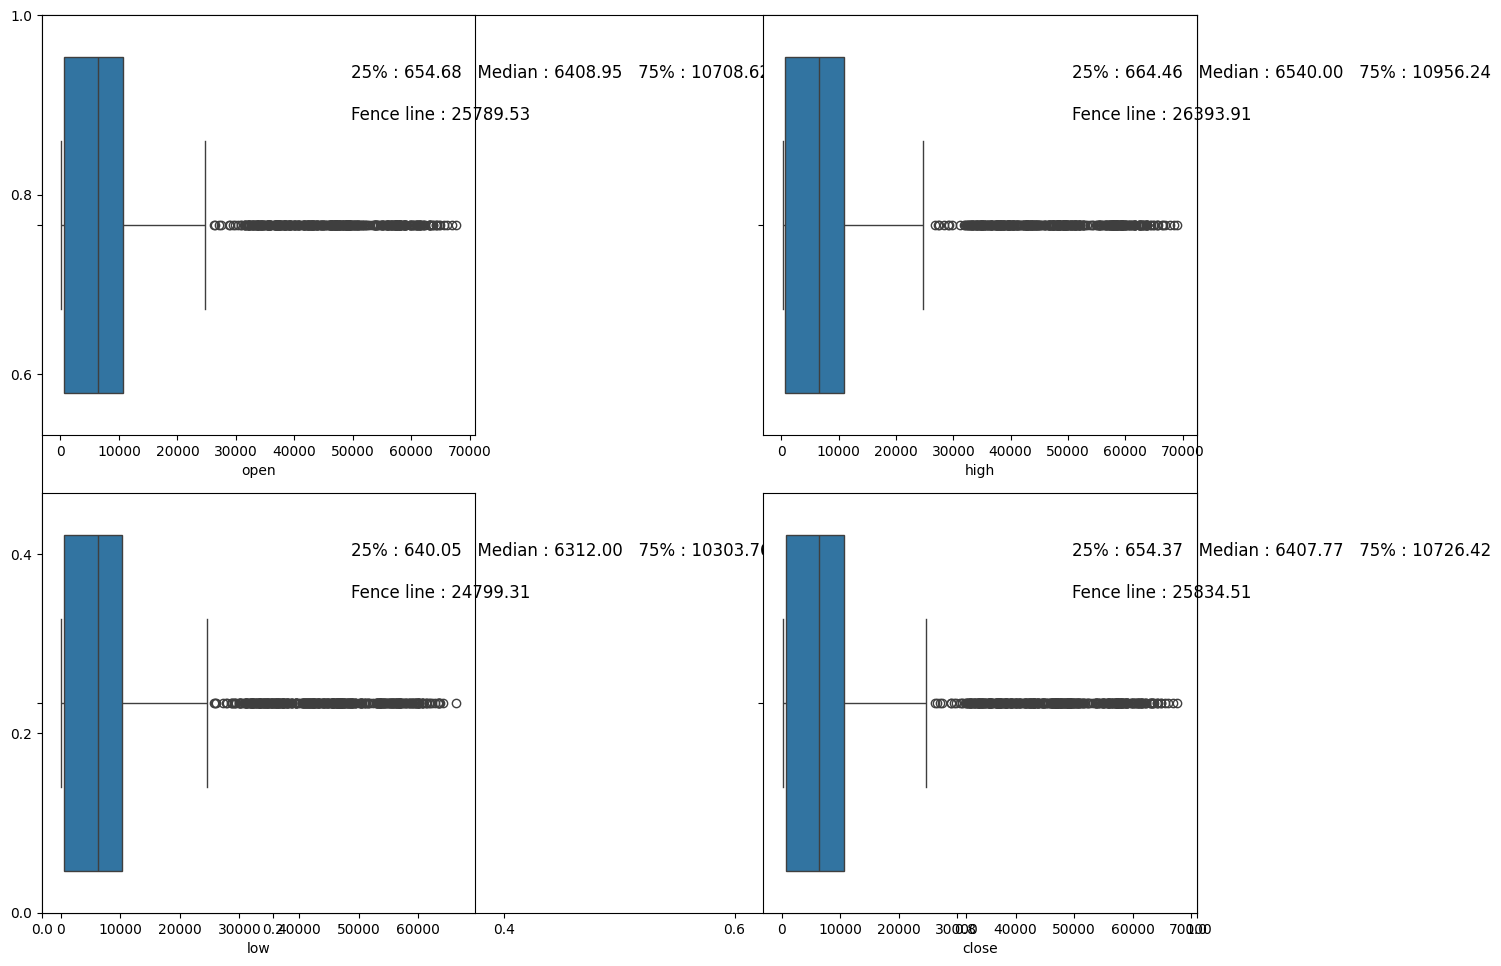

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define your features list if not defined
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    ax = sb.boxplot(x=df[col])  # Ensure to use x= for clarity
    q1, median, q3 = df[col].quantile([0.25, 0.5, 0.75])
    
    # Calculate dynamic text positions based on data range
    text_x = ax.get_xlim()[1] * 0.7  # Use 70% of the x-axis limit for text placement
    text_y_q1 = -0.35  # y-coordinate for Q1, adjust if needed
    text_y_fence = -0.25  # y-coordinate for fence line, adjust if needed
    
    # Prepare labels
    label_text = f"25% : {q1:.2f}   Median : {median:.2f}   75% : {q3:.2f}"
    plt.text(text_x, text_y_q1, label_text, fontsize=12)

    # Calculate IQR and fences
    IQR = q3 - q1
    k = 1.5  # Adjust this value if needed
    lower_fence = q1 - k * IQR
    upper_fence = q3 + k * IQR
    label_fence = f"Fence line : {upper_fence:.2f}"
    plt.text(text_x, text_y_fence, label_fence, fontsize=12)

plt.tight_layout()  # Adjusts subplots to fit in the figure area
plt.show()


In [12]:
# Convert 'date' column to datetime, this will automatically handle time portions
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Display the first few rows
print(df.head())


         unix       date   symbol      open      high       low     close  \
0  1646092800 2022-03-01  BTC/USD  43221.71  43626.49  43185.48  43185.48   
1  1646006400 2022-02-28  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2  1645920000 2022-02-27  BTC/USD  39146.66  39886.92  37015.74  37712.68   
3  1645833600 2022-02-26  BTC/USD  39242.64  40330.99  38600.00  39146.66   
4  1645747200 2022-02-25  BTC/USD  38360.93  39727.97  38027.61  39231.64   

    Volume BTC    Volume USD  year  month  day  
0    49.006289  2.116360e+06  2022      3    1  
1  3160.618070  1.364723e+08  2022      2   28  
2  1701.817043  6.418008e+07  2022      2   27  
3   912.724087  3.573010e+07  2022      2   26  
4  2202.851827  8.642149e+07  2022      2   25  


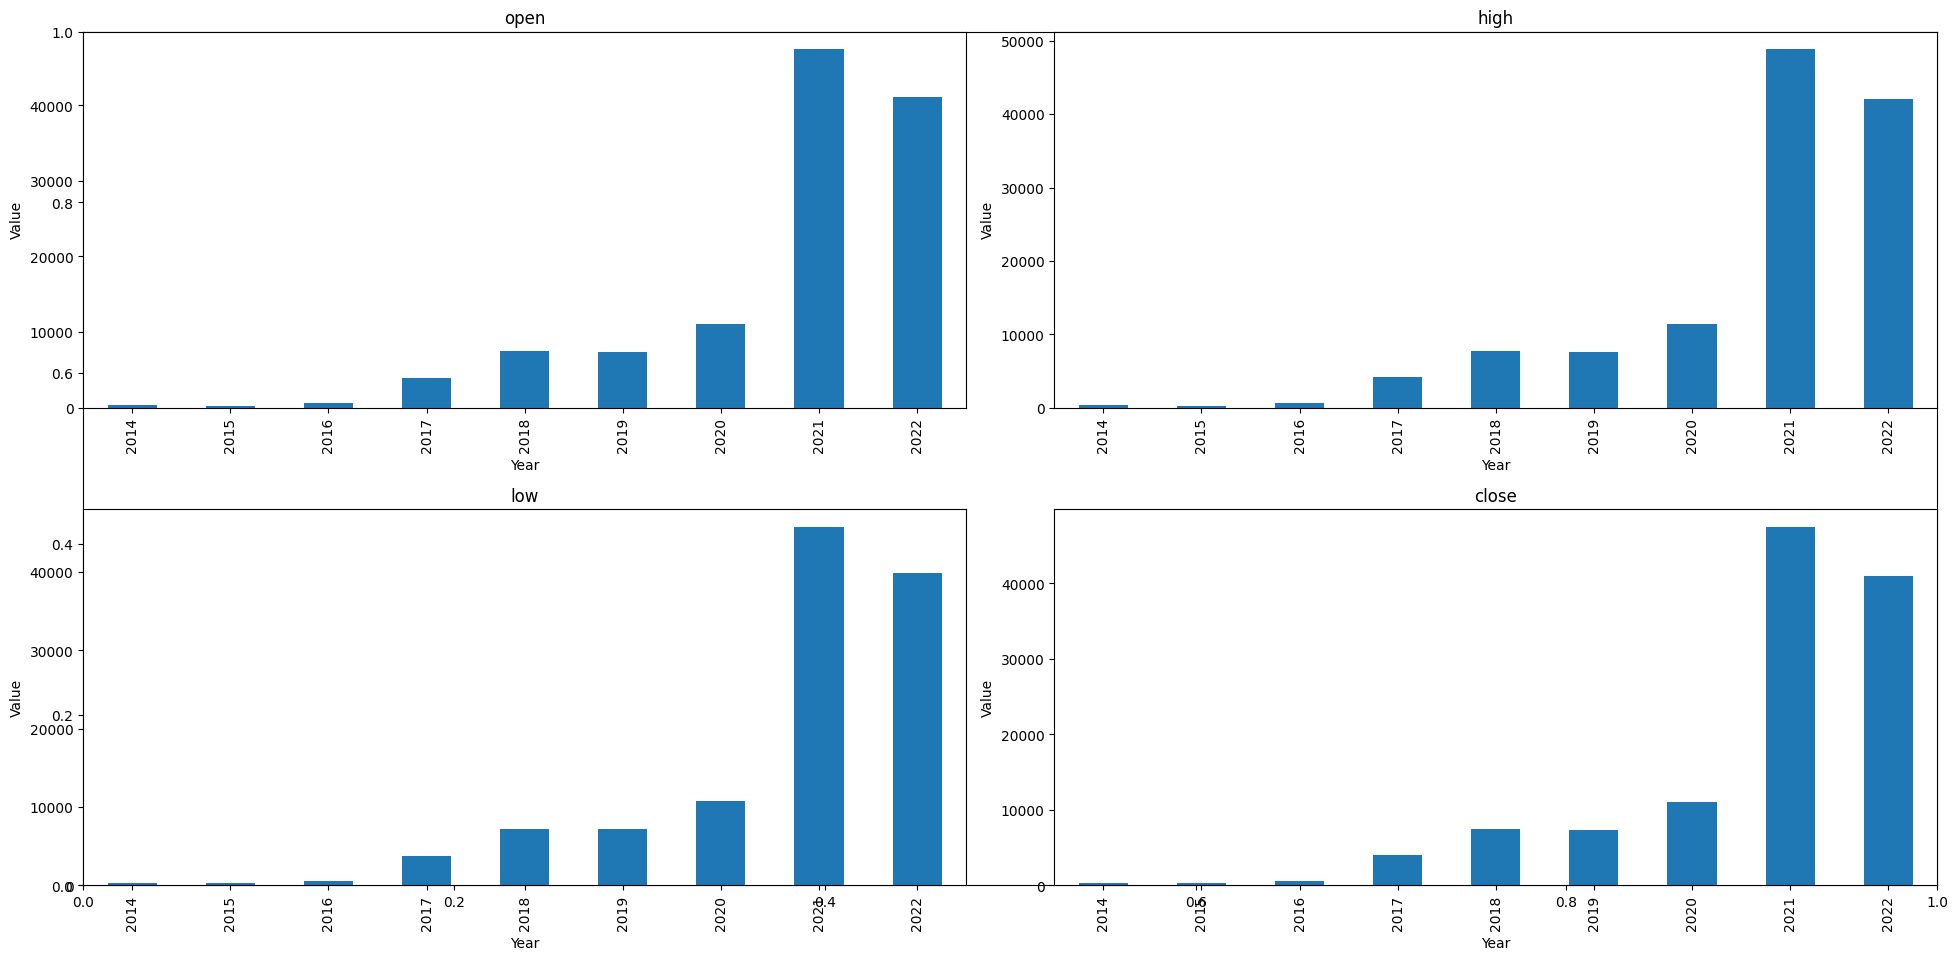

In [13]:
# Convert relevant columns to numeric if necessary
# This will ignore non-numeric columns during aggregation
data_grouped = df.groupby('year')[['open', 'high', 'low', 'close']].mean()

# Plotting
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.title(col)
    plt.xlabel('Year')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


         unix       date   symbol      open      high       low     close  \
0  1646092800 2022-03-01  BTC/USD  43221.71  43626.49  43185.48  43185.48   
1  1646006400 2022-02-28  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2  1645920000 2022-02-27  BTC/USD  39146.66  39886.92  37015.74  37712.68   
3  1645833600 2022-02-26  BTC/USD  39242.64  40330.99  38600.00  39146.66   
4  1645747200 2022-02-25  BTC/USD  38360.93  39727.97  38027.61  39231.64   

    Volume BTC    Volume USD  year  month  day  is_quarter_end  
0    49.006289  2.116360e+06  2022      3    1               1  
1  3160.618070  1.364723e+08  2022      2   28               0  
2  1701.817043  6.418008e+07  2022      2   27               0  
3   912.724087  3.573010e+07  2022      2   26               0  
4  2202.851827  8.642149e+07  2022      2   25               0  


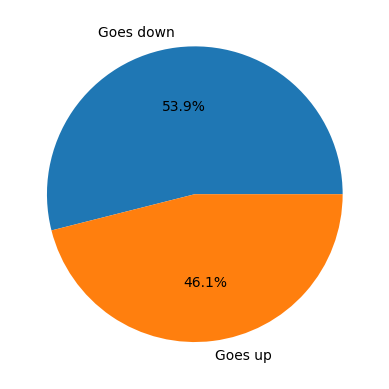

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
print(df.head())
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 0, 1)
plt.pie(df['target'].value_counts().values, 
        labels=["Goes down", "Goes up"], autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(10, 10))
 

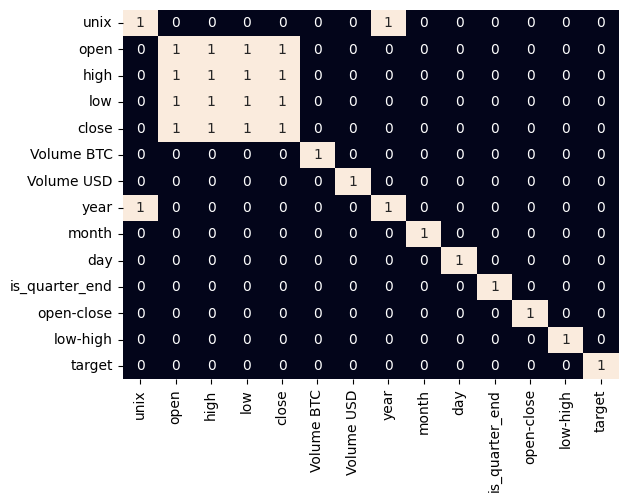

In [15]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for highly correlated features
correlation_matrix = numeric_df.corr()

# Visualize the heatmap for correlations above 0.8
high_correlation = correlation_matrix > 0.8
sb.heatmap(high_correlation, annot=True, cbar=False)
plt.show()


In [16]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 

In [17]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2385, 3) (266, 3)


LogisticRegression() : 
Training Accuracy :  0.9958426991739187
Validation Accuracy :  0.993468877782826

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9749429556611198
Validation Accuracy :  0.9618071331213085

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

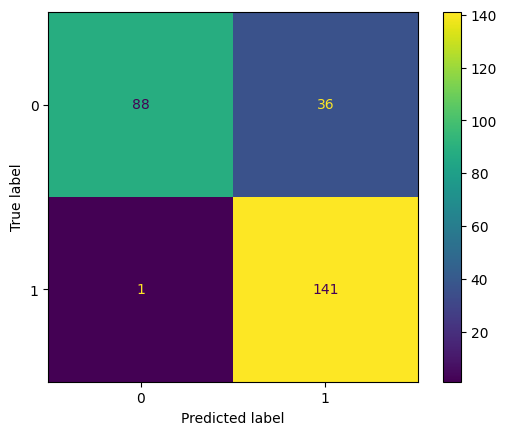

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()

print('\n\n0 : Goes up')
print('1 : Goes down')

# Plot confusion matrix for the first model
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()